In [ ]:
import json
import csv

def load_users_with_tweets(json_filepath, label):
    with open(json_filepath, 'r', encoding='utf-8') as f:
        users = json.load(f)

    rows = []
    for user in users:
        user_info = {
            "label": label,
            "nickname": user.get("nickname", ""),
            "gender": user.get("gender", ""),
            "profile": user.get("profile", ""),
            "birthday": user.get("birthday", ""),
            "num_of_follower": user.get("num_of_follower", ""),
            "num_of_following": user.get("num_of_following", ""),
            "all_tweet_count": user.get("all_tweet_count", ""),
            "original_tweet_count": user.get("original_tweet_count", ""),
            "repost_tweet_count": user.get("repost_tweet_count", "")
        }

        tweets = user.get("tweets", [])
        if tweets:
            for tweet in tweets:
                row = user_info.copy()
                row.update({
                    "tweet_content": tweet.get("tweet_content", "").replace("\n", " ").replace("\r", " "),
                    "posting_time": tweet.get("posting_time", ""),
                    "posted_picture_url": tweet.get("posted_picture_url", ""),
                    "num_of_likes": tweet.get("num_of_likes", ""),
                    "num_of_forwards": tweet.get("num_of_forwards", ""),
                    "num_of_comments": tweet.get("num_of_comments", ""),
                    "tweet_is_original": tweet.get("tweet_is_original", "")
                })
                rows.append(row)
        else:
            row = user_info.copy()
            row.update({
                "tweet_content": "",
                "posting_time": "",
                "posted_picture_url": "",
                "num_of_likes": "",
                "num_of_forwards": "",
                "num_of_comments": "",
                "tweet_is_original": ""
            })
            rows.append(row)
    return rows

# Files
depressed_file = "/content/drive/MyDrive/dataset nlp/depressed.json"
normal_file = "/content/drive/MyDrive/dataset nlp/normal.json"
output_csv = "weibo_users_tweets_combined.csv"

# Load and combine data
depressed_rows = load_users_with_tweets(depressed_file, label=1)
normal_rows = load_users_with_tweets(normal_file, label=0)
all_rows = depressed_rows + normal_rows

# Define CSV columns
columns = [
    "label",
    "nickname", "gender", "profile", "birthday",
    "num_of_follower", "num_of_following",
    "all_tweet_count", "original_tweet_count", "repost_tweet_count",
    "tweet_content", "posting_time", "posted_picture_url",
    "num_of_likes", "num_of_forwards", "num_of_comments",
    "tweet_is_original"
]

# Write to CSV
with open(output_csv, "w", newline="", encoding="utf-8") as f:
    writer = csv.DictWriter(f, fieldnames=columns)
    writer.writeheader()
    writer.writerows(all_rows)

print(f"Combined CSV file created: {output_csv}")


Combined CSV file created: weibo_users_tweets_combined.csv


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/weibo_users_tweets_combined.csv", encoding="utf-8")

# Display the first 10 rows
print(df.head(10))

# If you want to display the entire dataframe (careful if very large)
# print(df)


   label nickname gender        profile    birthday  num_of_follower  \
0      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
1      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
2      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
3      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
4      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
5      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
6      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
7      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
8      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   
9      1     迷失路径      男  此人严重丧，不适绕行，谢谢  1993-12-10                1   

   num_of_following  all_tweet_count  original_tweet_count  \
0                 0               10                    10   
1                 0               10                    10   
2                 0  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




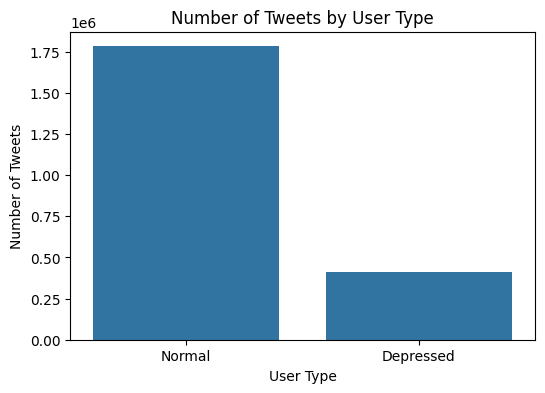

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title('Number of Tweets by User Type')
plt.xticks([0, 1], ['Normal', 'Depressed'])
plt.xlabel('User Type')
plt.ylabel('Number of Tweets')
plt.show()


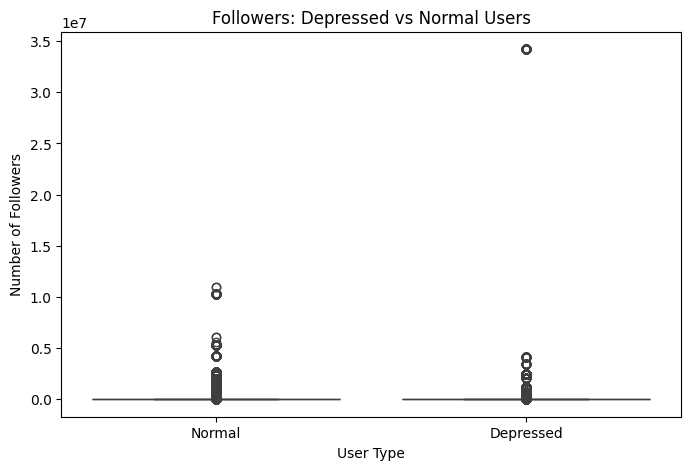

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="label", y="num_of_follower")
plt.title("Followers: Depressed vs Normal Users")
plt.xticks([0, 1], ['Normal', 'Depressed'])
plt.xlabel("User Type")
plt.ylabel("Number of Followers")
plt.show()


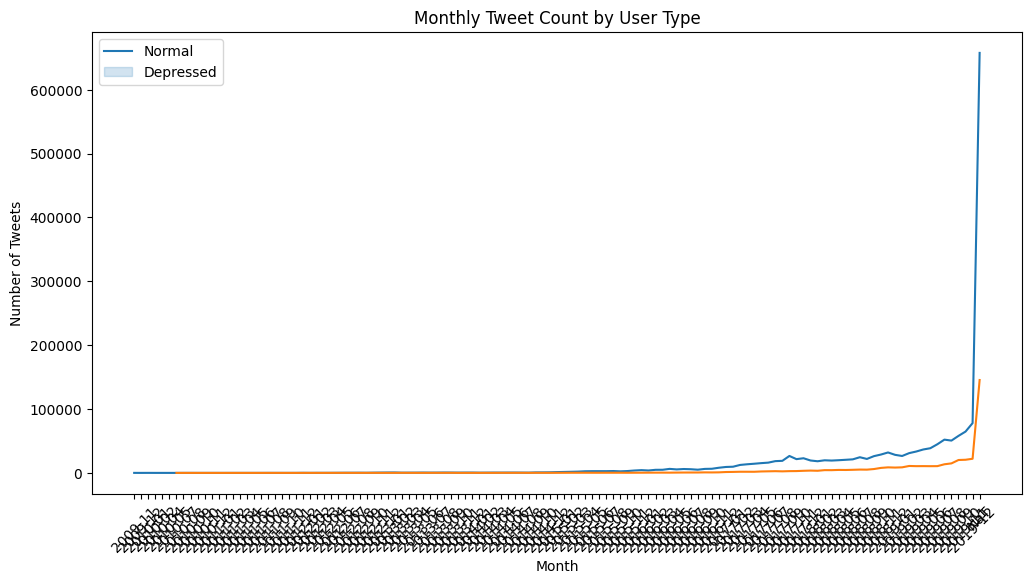

In [ ]:
# Convert posting_time to datetime
df['posting_time'] = pd.to_datetime(df['posting_time'], errors='coerce')

# Create month-year column
df['month_year'] = df['posting_time'].dt.to_period('M').astype(str)

# Group by month and label
monthly_tweets = df.groupby(['month_year', 'label']).size().reset_index(name='tweet_count')

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_tweets, x='month_year', y='tweet_count', hue='label')
plt.title("Monthly Tweet Count by User Type")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.legend(['Normal', 'Depressed'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
import re

In [ ]:
# Check missing values
print(df.isnull().sum())

# Fill missing numeric values (likes, followers, etc.) with 0
numeric_cols = ['num_of_follower', 'num_of_following', 'all_tweet_count',
                'original_tweet_count', 'repost_tweet_count',
                'num_of_likes', 'num_of_forwards', 'num_of_comments']
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill missing categorical/text values with empty string
text_cols = ['nickname', 'gender', 'profile', 'tweet_content', 'posted_picture_url']
df[text_cols] = df[text_cols].fillna('')


label                        0
nickname                     0
gender                       0
profile                    195
birthday                     0
num_of_follower              0
num_of_following             0
all_tweet_count              0
original_tweet_count         0
repost_tweet_count           0
tweet_content            64084
posting_time            802917
posted_picture_url           0
num_of_likes                 0
num_of_forwards              0
num_of_comments              0
tweet_is_original            0
month_year                   0
dtype: int64


In [ ]:
# Convert to appropriate types
df[numeric_cols] = df[numeric_cols].astype(int)
df['label'] = df['label'].astype(int)


In [ ]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\u4e00-\u9fff\s]", "", text)  # Remove punctuation except Chinese
    text = text.lower()
    text = text.strip()
    return text

df['tweet_content_clean'] = df['tweet_content'].apply(clean_text)
df['profile_clean'] = df['profile'].apply(clean_text)


In [ ]:
df = df.drop_duplicates(subset=["nickname", "tweet_content_clean"])


In [ ]:
pip install jieba emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.5 MB/s eta 0:00:00


In [ ]:
import jieba
import re
import emoji

# Your custom stopwords
stopwords = set([
    "的", "了", "和", "是", "我", "你", "在", "有", "不", "也", "就", "他", "们",
    "我们", "你们", "它", "她", "着", "到", "与", "被", "这", "那",
    "the", "is", "are", "and", "or", "but", "if", "in", "of", "to", "with",
    "you", "your", "we", "our", "it", "they", "them"
])

# Fill text columns with empty string for missing values
text_cols = ['nickname', 'gender', 'profile', 'tweet_content', 'posted_picture_url']
df[text_cols] = df[text_cols].fillna('')

def clean_text(text):
    text = str(text)
    text = emoji.replace_emoji(text, replace='')              # Remove emojis
    text = re.sub(r"@\w+", "", text)                          # Remove mentions
    text = re.sub(r"#\S+#", "", text)                         # Remove hashtags
    text = re.sub(r"http\S+", "", text)                       # Remove URLs
    text = re.sub(r"[^\w\u4e00-\u9fff\s]", "", text)          # Remove punctuation (keep Chinese, letters, numbers)
    text = text.lower().strip()
    words = [w for w in jieba.lcut(text) if w not in stopwords and w.strip() != '']
    return ' '.join(words)

# Apply cleaning for content and profile
df['tweet_content_clean'] = df['tweet_content'].apply(clean_text)
df['profile_clean'] = df['profile'].apply(clean_text)

# Remove duplicate tweets by user after cleaning
df = df.drop_duplicates(subset=["nickname", "tweet_content_clean"])

print("Preprocessing complete! Dataframe is cleaned and ready for feature engineering.")


/tmp/ipython-input-274155099.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_cols] = df[text_cols].fillna('')
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.800 seconds.
DEBUG:jieba:Loading model cost 0.800 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.
/tmp/ipython-input-274155099.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

Preprocessing complete! Dataframe is cleaned and ready for feature engineering.


In [ ]:
df.to_csv("weibo_users_tweets_preprocessed.csv", index=False, encoding='utf-8')
print("Preprocessing complete! Saved to weibo_users_tweets_preprocessed.csv")


Preprocessing complete! Saved to weibo_users_tweets_preprocessed.csv
